In [334]:
# Importando as bibliotecas utilizados
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing 
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [335]:
# Leitura dos dados deste DF
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [336]:
df.count().sort_values()
df.isna().sum().sort_values()

Date                 0
Location             0
MaxTemp           1261
MinTemp           1485
Temp9am           1767
WindSpeed9am      1767
Humidity9am       2654
WindSpeed3pm      3062
Rainfall          3261
RainToday         3261
RainTomorrow      3267
Temp3pm           3609
WindDir3pm        4228
Humidity3pm       4507
WindGustSpeed    10263
WindGustDir      10326
WindDir9am       10566
Pressure3pm      15028
Pressure9am      15065
Cloud9am         55888
Cloud3pm         59358
Evaporation      62790
Sunshine         69835
dtype: int64

In [337]:
print("O dataset possui {} linhas e {} colunas".format(df.shape[0], df.shape[1]))
df.isnull().sum()
quantidade_de_colunas_dropadas = 0
# Definindo a porcentagem máxima de valores nulos permitida
media_porcentagem_nulos_df = df.isna().mean().mean() 
print(media_porcentagem_nulos_df)

# Loop pelas colunas do DataFrame
for coluna in df.columns:
    # Calculando a porcentagem de valores nulos na coluna
    porcentagem_nulos = df[coluna].isnull().sum() / len(df)
    print(f"Coluna {coluna} não eliminada porcentagem de nulos: {porcentagem_nulos:.2%} de valores nulos.")
    # Verificando se a porcentagem de valores nulos na coluna é maior ou igual ao limite máximo permitido
    if porcentagem_nulos >= media_porcentagem_nulos_df:
        # Imprimindo mensagem informando que a coluna será eliminada
        print(f"Coluna {coluna} será eliminada por conter {porcentagem_nulos:.2%} de valores nulos.")
        # Removendo a coluna do DataFrame
        df.drop(columns=[coluna], inplace=True)
        # Calculando quantas colunas foram dropadas do dataframe
        quantidade_de_colunas_dropadas = quantidade_de_colunas_dropadas + 1
print("O dataset possui {} linhas e {} colunas".format(df.shape[0], df.shape[1]))

O dataset possui 145460 linhas e 23 colunas
0.10259745694319072
Coluna Date não eliminada porcentagem de nulos: 0.00% de valores nulos.
Coluna Location não eliminada porcentagem de nulos: 0.00% de valores nulos.
Coluna MinTemp não eliminada porcentagem de nulos: 1.02% de valores nulos.
Coluna MaxTemp não eliminada porcentagem de nulos: 0.87% de valores nulos.
Coluna Rainfall não eliminada porcentagem de nulos: 2.24% de valores nulos.
Coluna Evaporation não eliminada porcentagem de nulos: 43.17% de valores nulos.
Coluna Evaporation será eliminada por conter 43.17% de valores nulos.
Coluna Sunshine não eliminada porcentagem de nulos: 48.01% de valores nulos.
Coluna Sunshine será eliminada por conter 48.01% de valores nulos.
Coluna WindGustDir não eliminada porcentagem de nulos: 7.10% de valores nulos.
Coluna WindGustSpeed não eliminada porcentagem de nulos: 7.06% de valores nulos.
Coluna WindDir9am não eliminada porcentagem de nulos: 7.26% de valores nulos.
Coluna WindDir3pm não eliminad

In [338]:
df.count().sort_values()

WindDir9am       134894
WindGustDir      135134
WindGustSpeed    135197
Humidity3pm      140953
WindDir3pm       141232
Temp3pm          141851
RainTomorrow     142193
RainToday        142199
Rainfall         142199
WindSpeed3pm     142398
Humidity9am      142806
WindSpeed9am     143693
Temp9am          143693
MinTemp          143975
MaxTemp          144199
Location         145460
Date             145460
dtype: int64

In [339]:
df.isna().sum().sort_values()

Date                 0
Location             0
MaxTemp           1261
MinTemp           1485
Temp9am           1767
WindSpeed9am      1767
Humidity9am       2654
WindSpeed3pm      3062
Rainfall          3261
RainToday         3261
RainTomorrow      3267
Temp3pm           3609
WindDir3pm        4228
Humidity3pm       4507
WindGustSpeed    10263
WindGustDir      10326
WindDir9am       10566
dtype: int64

In [340]:
# Remove as linhas que contêm pelo menos um valor nulo
df.dropna(how='any', inplace=True)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,No


In [341]:
# Substitui os valores da coluna para valores numericos para melhor avaliação dos resultados
df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace=True)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,17.8,29.7,0,0


In [342]:
df = df.drop(columns=['Location', 'Date', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,16.9,21.8,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,17.2,24.3,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,21.0,23.2,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,18.1,26.5,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,17.8,29.7,0,0


In [343]:
"""
df['WindDir9am_Numerico'], _ = pd.factorize(df['WindDir9am'])
df['WindDir3pm_Numerico'], _ = pd.factorize(df['WindDir3pm'])
df['WindGustDir_Numerico'], _ = pd.factorize(df['WindGustDir'])
df.head()

dir1 = df['WindGustDir'].unique()
dir2 = df['WindDir9am'].unique()
dir3 = df['WindDir3pm'].unique()

valores = ['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW']

# Criação do LabelEncoder
encoder = LabelEncoder()

# Ajuste e transformação dos valores
valores_codificados = encoder.fit_transform(valores)

print(valores_codificados)
"""


# Aquela normalizada criminosa dos valores
scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.516509,0.523629,0.001632,0.289062,0.211765,0.258824,0.71,0.22,0.508439,0.522073,0.0,0.0
1,0.375000,0.565217,0.000000,0.289062,0.023529,0.235294,0.44,0.25,0.514768,0.570058,0.0,0.0
2,0.504717,0.576560,0.000000,0.304688,0.200000,0.282353,0.38,0.30,0.594937,0.548944,0.0,0.0
3,0.417453,0.620038,0.000000,0.132812,0.105882,0.082353,0.45,0.16,0.533755,0.612284,0.0,0.0
4,0.613208,0.701323,0.002720,0.265625,0.058824,0.211765,0.82,0.33,0.527426,0.673704,0.0,0.0


___________________ DecisionTreeClassifier() ___________________
Matriz de confusão:
 [[27067  1457]
 [ 4933  3080]]
Acurácia do modelo: 0.8251087938254372


c:\Users\vhcla\faculdade\ml-2023-1-trabalho-final\venv\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


___________________ KNeighborsClassifier() ___________________
Matriz de confusão:
 [[25845  2679]
 [ 4365  3648]]
Acurácia do modelo: 0.8072091304704819


c:\Users\vhcla\faculdade\ml-2023-1-trabalho-final\venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


___________________ GaussianNB() ___________________
Matriz de confusão:
 [[26156  2368]
 [ 4642  3371]]
Acurácia do modelo: 0.808139694008813


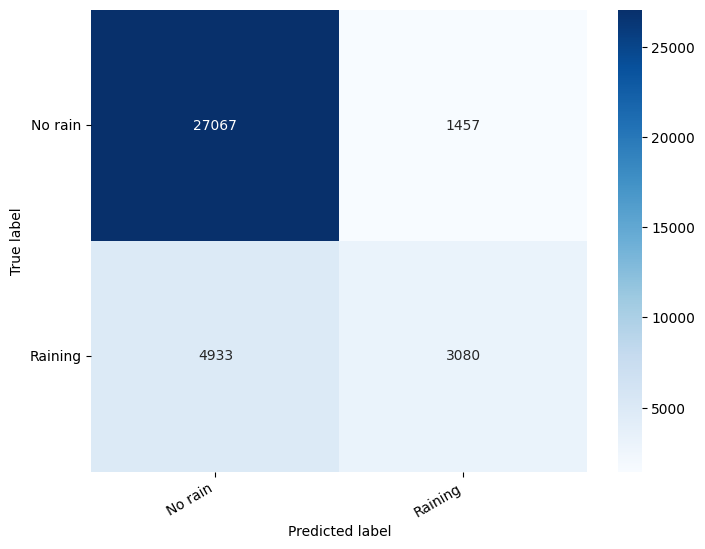

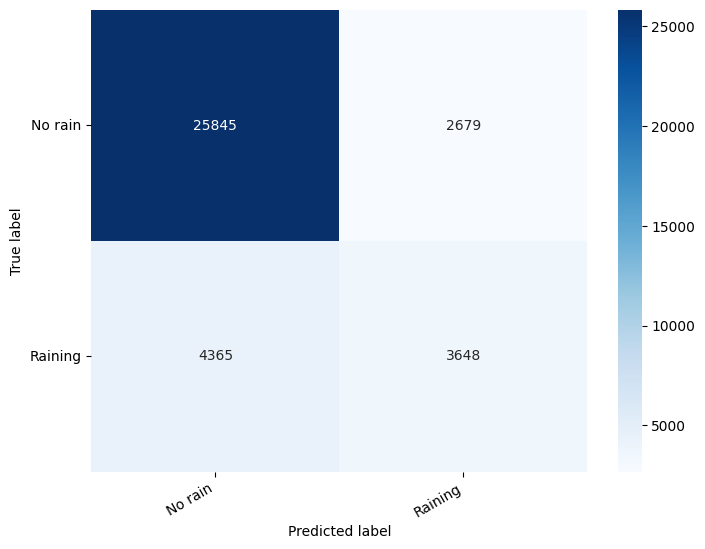

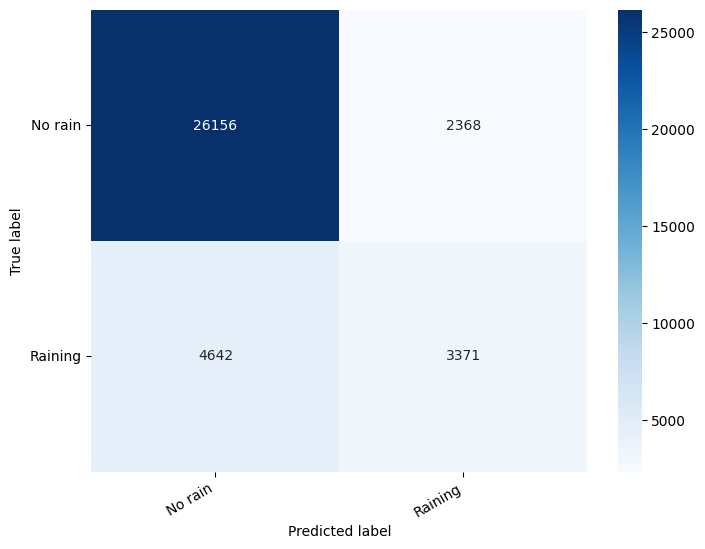

In [344]:
modelos = [DecisionTreeClassifier(), KNeighborsClassifier()]
for modelo in modelos:
    
    X = df[['Humidity3pm','Rainfall','RainToday']]
    y = df[['RainTomorrow']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, zero_division=0)
    print(f'___________________ {modelo} ___________________')
    print("Matriz de confusão:\n", conf_matrix)
    print("Acurácia do modelo:", accuracy)
    # print("Revogação das Classes\n", class_report)
    classes = ['No rain', 'Raining']
    df_cm = pd.DataFrame(conf_matrix, index=classes, columns=classes)

    # Plota a matriz de confusão usando o seaborn
    plt.figure(figsize=(8, 6))
    hmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')

    # Configurações adicionais do gráfico
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
    """
    # Cria a figura e o eixo
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plota a matriz de confusão usando o seaborn
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
                xticklabels=['Verdadeiro Positivo', 'Sem chuva'],
                yticklabels=['Falso Positivo', 'Verdeiro Negativo'])

    # Configurações adicionais do gráfico
    ax.set_xlabel('Classe Prevista')
    ax.set_ylabel('Classe Verdadeira')
    ax.set_title('Matriz de Confusão')

    # Mostra o gráfico
    plt.show()
    """
        